## ***Testing Phase: RNN Functionalities***

In [544]:
import pandas as pd
from pylatexenc.latex2text import LatexNodes2Text
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

In [545]:
# Function For Converting LaTeX Code To Unicode Text
# & Pre-Processing The Words For The Data Set 
def latex_to_text_converter(latex_code):
    python_text = LatexNodes2Text().latex_to_text(latex_code)
    return python_text

In [546]:
# Function For Cleaning Up The Text
def clean_up_and_filter_text(python_text):
    stop_words = set(stopwords.words("english"))

    words_in_sentence = word_tokenize(python_text)
    filtered_words = " ".join([word.lower() for word in words_in_sentence 
                  if word.lower() not in stop_words])
    return filtered_words

In [547]:
# Create LaTeX code
math_latex_code = r"""\text{According to the theorem for} \ \Theta \ \text{- Notation}, \begin{equation}f(n) + g(n) = \in \Theta(max\{f(n),g(n)\}) \ \text{such that}, 0 
\leq c_{1}max\{f(n),g(n)\} \leq f(n) + g(n) \leq c_{2}max\{f(n),g(n)\} \ \text{for all} \ n \geq n_{0}\end{equation}. \ \text{Which means for this statement to 
universally hold}, \begin{equation}f(n) + g(n) \in \Theta(max\{f(n),g(n)\}), \ \text{if and only if} \ f(n) + g(n) \in O(max\{f(n),g(n)\})\end{equation} \ \text{and} 
\ \begin{equation}f(n) + g(n) \in \Omega(max\{f(n),g(n)\})\end{equation}."""
print(math_latex_code)

\text{According to the theorem for} \ \Theta \ \text{- Notation}, \begin{equation}f(n) + g(n) = \in \Theta(max\{f(n),g(n)\}) \ \text{such that}, 0 
\leq c_{1}max\{f(n),g(n)\} \leq f(n) + g(n) \leq c_{2}max\{f(n),g(n)\} \ \text{for all} \ n \geq n_{0}\end{equation}. \ \text{Which means for this statement to 
universally hold}, \begin{equation}f(n) + g(n) \in \Theta(max\{f(n),g(n)\}), \ \text{if and only if} \ f(n) + g(n) \in O(max\{f(n),g(n)\})\end{equation} \ \text{and} 
\ \begin{equation}f(n) + g(n) \in \Omega(max\{f(n),g(n)\})\end{equation}.


In [548]:
# Create regular python unicode text
omega_wolf_text = """Omega wolves are the lowest-ranking, most-submissive, and timid members of the group — at least according 
to older interpretations of wolf pack ranks. They were often thought to be the scapegoats or 'punching bags' of the pack, absorbing 
aggression from others and living on the outskirts."""
print(omega_wolf_text)

Omega wolves are the lowest-ranking, most-submissive, and timid members of the group — at least according 
to older interpretations of wolf pack ranks. They were often thought to be the scapegoats or 'punching bags' of the pack, absorbing 
aggression from others and living on the outskirts.


In [549]:
# Convert LaTeX code to regular python unicode text
math_python_text = latex_to_text_converter(math_latex_code)
print(math_python_text)

According to the theorem for  Θ - Notation, 
    f(n) + g(n) = ∈Θ(max{f(n),g(n)})  such that, 0 
    ≤ c_1max{f(n),g(n)}≤ f(n) + g(n) ≤ c_2max{f(n),g(n)} for all n ≥ n_0
.  Which means for this statement to 
universally hold, 
    f(n) + g(n) ∈Θ(max{f(n),g(n)}),  if and only if f(n) + g(n) ∈ O(max{f(n),g(n)})
  and 
 
    f(n) + g(n) ∈Ω(max{f(n),g(n)})
.


In [550]:
# Remove stopwords in math text
math_python_filtered = clean_up_and_filter_text(math_python_text)
math_python_filtered

'according theorem θ - notation , f ( n ) + g ( n ) = ∈θ ( max { f ( n ) , g ( n ) } ) , 0 ≤ c_1max { f ( n ) , g ( n ) } ≤ f ( n ) + g ( n ) ≤ c_2max { f ( n ) , g ( n ) } n ≥ n_0 . means statement universally hold , f ( n ) + g ( n ) ∈θ ( max { f ( n ) , g ( n ) } ) , f ( n ) + g ( n ) ∈ ( max { f ( n ) , g ( n ) } ) f ( n ) + g ( n ) ∈ω ( max { f ( n ) , g ( n ) } ) .'

In [551]:
# Remove stopwords in omega text
omega_wolf_filtered = clean_up_and_filter_text(omega_wolf_text)
omega_wolf_filtered

"omega wolves lowest-ranking , most-submissive , timid members group — least according older interpretations wolf pack ranks . often thought scapegoats 'punching bags ' pack , absorbing aggression others living outskirts ."

In [566]:
# Create The Textual Dataset & The Data Set Labels
textual_content_array = [math_python_filtered,omega_wolf_filtered]      # Text Content
labels = [0,1]                                                          # 1 - Math text & 0 - Non-Math Text
testing_data = {"text": textual_content_array, "label": labels} # Create The Dataset
testing_dataset = pd.DataFrame(testing_data)                 # Create The DataFrame
testing_dataset["text"]

0    according theorem θ - notation , f ( n ) + g (...
1    omega wolves lowest-ranking , most-submissive ...
Name: text, dtype: object

In [553]:
# Building The RNN Model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(
        input_dim=5000,
        output_dim=64,
        input_length=50),
    tf.keras.layers.SimpleRNN(64,return_sequences=False),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.summary()

c:\Users\toben\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_39"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_41 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_39 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [554]:
# Compiling The RNN Model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"])

In [558]:
# Training The Model
words_tokenizer = Tokenizer(num_words=5000)
words_tokenizer.fit_on_texts([testing_dataset["text"][0]])

# Create Training Content
train_sequences_of_the_words = words_tokenizer.texts_to_sequences([testing_dataset["text"][0]])
train_stuff = pad_sequences(train_sequences_of_the_words,
                            maxlen=50,
                            padding='post')
train_labels = np.array([testing_dataset["label"][0]])

# Create Testing Content
test_sequences_of_the_words = words_tokenizer.texts_to_sequences([testing_dataset["text"][1]])
test_stuff = pad_sequences(test_sequences_of_the_words,
                            maxlen=50,
                            padding='post')
test_labels = np.array([testing_dataset["label"][1]])


history = model.fit(train_stuff,
          train_labels,
          epochs=10,
          validation_data = (test_stuff,test_labels))

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0396 - val_accuracy: 1.0000 - val_loss: 0.3559
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0337 - val_accuracy: 1.0000 - val_loss: 0.3559
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 1.0000 - loss: 0.0290 - val_accuracy: 1.0000 - val_loss: 0.3457
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 992ms/step - accuracy: 1.0000 - loss: 0.0251 - val_accuracy: 1.0000 - val_loss: 0.3252
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 344ms/step - accuracy: 1.0000 - loss: 0.0218 - val_accuracy: 1.0000 - val_loss: 0.3106
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.3125
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step - accuracy: 1.0000 - loss: 0.0169 - val_accuracy: 1.0000 - val_loss: 0.3245
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 1.0000 - loss: 0.0150 - val_accuracy: 1.0000 - val_loss: 0.3310
E

In [559]:
testing_text = [
    clean_up_and_filter_text("I love bagels!"),
    clean_up_and_filter_text("lim_n→∞ f(n) = 25n^2+15n+5"),
    clean_up_and_filter_text("I'm currently watching my favourite tV show!"),
    clean_up_and_filter_text("f(n) + g(n) ∈Ω(max{f(n),g(n)})."),
    clean_up_and_filter_text("I love going to school and attending art class"),
]
testing_sequences_of_the_sentences = words_tokenizer.texts_to_sequences(testing_text)

testing_stuff = pad_sequences(testing_sequences_of_the_sentences,
                            maxlen=50,
                            padding='post')

predictions = model.predict(testing_stuff)
for i in range(len(predictions)):
    if (predictions[i] > 0.65):
        print("This sentence is math related!")
    else:
        print("This sentence is not math related!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
This sentence is not math related!
This sentence is math related!
This sentence is not math related!
This sentence is math related!
This sentence is not math related!


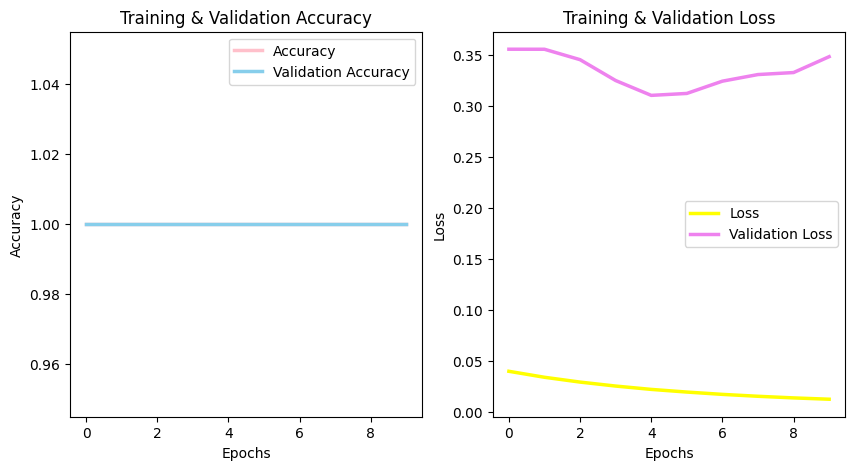

In [563]:
# Plot The Results After Training The RNN Model
history_dict = history.history

accuracy = history_dict["accuracy"]
val_accuracy = history_dict["val_accuracy"]

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.plot(accuracy, linewidth=2.5, color="pink")
plt.plot(val_accuracy,linewidth=2.5, color="skyblue")
plt.title("Training & Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy","Validation Accuracy"])

plt.subplot(1,2,2)
plt.plot(loss, linewidth=2.5, color="yellow")
plt.plot(val_loss, linewidth=2.5, color="violet")
plt.title("Training & Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss","Validation Loss"])

plt.show()